## Cleaning Wellesley Hive Data

**Author:** Briana Vigil

**Purpose:** Clean data from the profiles of alums on the Wellesley Hive to look at their undergraduate major, year graduated, current career path, graduate school experience or lack thereof.

November 29, 2020

In [1]:
from bs4 import BeautifulSoup as BS
import numpy as np
import pandas as pd
import json

Read in dataset

In [1]:
df = pd.read_pickle('hive_data_cleaned')

In [2]:
#df

In [3]:
#df['person-details-container__info-line'][:1][0]

Filter out dataset to just get the columns we are interested in exploring

In [ ]:
df = df.filter(['majorCleaning', 'grad_school', 'major1', 'major2'])

In [4]:
#df

In [ ]:
df['majorCleaning'][:1][0]

['Courtauld Institute of Art',
 " Master's Degree",
 ' 2013',
 ' History of Art & Architecture',
 ' Bard Graduate Center',
 " Master's Degree",
 ' 2015',
 ' Decorative Arts & Design History',
 ' Harvard University',
 ' PhD - Doctor of Philosophy',
 ' History of Art & Architecture']

### Goal: 
With the filtered data frame, we first determine whether or not the alum went to grad school, and what kind of degrees most alums in the tech industry have.

In [ ]:
bachelorsCounter = 0
for grad in df['grad_school']:
    if grad == False:
        bachelorsCounter += 1
        
bachelorsCounter 

410

In [ ]:
#drop all the False rows in grad_school column
df.drop(df[df['grad_school'] == False].index, inplace = True)

In [5]:
#df

In [ ]:
educationDetails = df['majorCleaning']
mastersCounter = 0
for details in educationDetails:
    for phrase in details:
        if 'Master' in phrase:
            mastersCounter += 1
mastersCounter

320

In [ ]:
educationDetails = df['majorCleaning']
phdCounter = 0
for details in educationDetails:
    for phrase in details:
        if 'PhD' in phrase:
            phdCounter += 1
phdCounter

70

We know the types of degrees that alums got, now lets put that into a visualization!

In [ ]:
gradPlansDict = {"Bachelor's": bachelorsCounter ,
                 "Master's Degree": mastersCounter,
                "PhD":phdCounter}

In [ ]:
gradPlansDict

{"Bachelor's": 410, "Master's Degree": 320, 'PhD': 70}

In [ ]:
gradPlansDict.values()

dict_values([410, 320, 70])

In [ ]:
amount = [amt for amt in gradPlansDict.values()]

In [ ]:
amount

[410, 320, 70]

In [ ]:
import plotly.graph_objects as go

In [ ]:
gradPlansDict.keys()

dict_keys(["Bachelor's", "Master's Degree", 'PhD'])

In [ ]:
title =[key for key in gradPlansDict.keys()]
amount = [amt for amt in gradPlansDict.values()]

fig = go.Figure([go.Bar(x=title, y=amount, marker_color= 'purple')])
fig.update_layout(xaxis=dict(title='Highest Degree Earned', tickmode='linear'), yaxis = dict(title = 'Alum Count'))
fig.show()

In [ ]:
title

["Bachelor's", "Master's Degree", 'PhD']

In [ ]:
amount

[410, 320, 70]

### Goal:
Using filtered data frame, see what kind of insitutions alums went to using the information they put into their description is split by the commas and we 
look which school they went to grad school for. The name of the institution is usually in front of 
the kind of degree they got

ex. Wellesley College, Bachelors, 2010, Boston University, Masters, 2013, etc

Make a wordcloud with this?

In [ ]:
##First, get all of the institutions that have the word 'University', 'Graduate', 'Institute'
gradSchoolsList = []
for gradSchool in df['majorCleaning']:
    for details in gradSchool:
            if 'University' in details or 'Graduate' in details or 'Institute' in details or 'College' in details or 'College' in details or 'Univ' in details or 'sch' in details or 'School' in details or 'Academy' in details or 'inst' in details or 'Université' in details:
                gradSchoolsList.append(details)
            
gradSchoolsList

['Courtauld Institute of Art',
 ' Bard Graduate Center',
 ' Harvard University',
 'Wellesley College',
 'Boston University',
 'Tufts University',
 'Massachusetts Institute of Technology (MIT)',
 ' Stanford University',
 ' University of Pennsylvania (UPenn)',
 'Columbia University in the City of New York',
 ' Oral History Summer Institute',
 ' Sarah Lawrence College',
 'Stanford University',
 'Massachusetts Institute of Technology - Sloan School of Management',
 ' Université Paris-Sorbonne',
 " St. Paul's School",
 ' Wellesley College',
 'Columbia University',
 ' Brandeis Univ',
 ' Northwestern Univ',
 ' Williams College',
 'Harvard Univ',
 ' University Michigan-Ann Arbor',
 ' Harvard Univ',
 ' Yale University - Divinity School',
 ' Boston College',
 'Univ Pennsylvania',
 ' School of Visual Arts',
 'University of Pennsylvania - The Wharton School',
 'Cornell University',
 ' School of the Art Institute of Chicago',
 ' University of  London',
 'Columbia Univ Sch of Gen Stud',
 ' Univ Cali

In [ ]:
for school in gradSchoolsList:
    if 'Wellesley' in school or 'Welles' in school or ' Wellesley' in school:
        gradSchoolsList.remove(school)

In [ ]:
gradSchoolsList

In [ ]:
gradSeries = pd.Series(gradSchoolsList)

In [ ]:
gradSeries.value_counts()

 Harvard Univ                       18
 Yale University                    10
 New York University                 9
 Boston Univ                         8
Stanford University                  8
                                    ..
 TheCoaches Training Institute       1
 University of Vermont (Vermont)     1
 Courtald Institute of Art           1
 Duke Univ                           1
 Southern Methodist Univ             1
Length: 285, dtype: int64

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [ ]:
def updateStopWords(language, words=set()):
    sW = set(stopwords.words(language))
    return sW.union(words)

In [ ]:
sW = updateStopWords('english', ['Univ'])

In [ ]:
def createWordCloud(text, stopwords, fileName, w, h, numWords, backColor, colormap):
    wcloud = WordCloud(stopwords=stopwords, width=w, height=h, 
                   max_words=numWords, colormap=colormap, 
                   background_color=backColor).generate(text)
    plt.figure(1,(w/100,h/100)) 
    plt.imshow(wcloud, interpolation="bilinear") 
    plt.axis("off") 
    plt.margins(x=0, y=0) 
    plt.show()
    
    wcloud.to_file(fileName) 

In [ ]:
strGradSchools = str(gradSchoolsList)

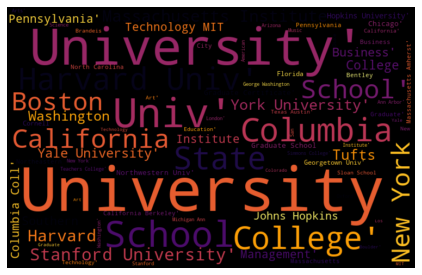

In [ ]:
createWordCloud(strGradSchools, sW, 'gradSchoolsWordCloud.png', 750, 480, 80, 'black', 'inferno')

eh, don't love it

### Goal:
Look at the types of majors that went on to pursue a career in tech

In [ ]:
df

,majorCleaning,grad_school,major1,major2
0,"[Courtauld Institute of Art, Master's Degree,...",True,Art History,
1,"[Wellesley College, Bachelor's Degree, 2016,...",True,MAS,
2,"[Boston University, Master's Degree, 2016, ...",True,Physics,
3,"[Tufts University, Master's Degree, 2009, M...",True,Physics,
4,"[Massachusetts Institute of Technology (MIT), ...",True,Middle Eastern Studies,
...,...,...,...,...
768,"[ Wellesley College, Bachelor of Arts (B.A.),...",True,Cognitive Science,Math
785,"[ Wellesley College, B.A., 2009, Psychology...",True,Psychology,Economics
791,"[ Simmons College, Master's Degree, 2020, D...",True,Environmental Studies,Computer Science
798,"[ Relay Graduate School of Education, Master ...",True,Math,English


In [ ]:
df['major2'][:1][0]

''

In [ ]:
#put all majors in major1 column into a list for easier cleaning
major1List = []
for major in df['major1']:
    if major != '':
        major1List.append(major)
        
major1List

['Art History',
 'MAS',
 'Physics',
 'Physics',
 'Middle Eastern Studies',
 'English',
 'English',
 'Chemistry',
 'Art History',
 'Russian',
 'Geology',
 'Art History',
 'Political Science',
 'Language Studies',
 'Economics',
 'Art History',
 'Art Studio',
 'Economics',
 'Art Studio',
 'Political Science',
 'Economics',
 'Art History',
 'Philosophy',
 'Art History',
 'Economics',
 'Spanish',
 'French',
 'MAS',
 'Indiv-Urban Studies',
 'Japanese',
 'Astronomy',
 'Computer Science',
 'Chinese',
 'Economics',
 'Political Science',
 'English',
 'English',
 'Chemistry',
 'Economics',
 'Language Studies',
 'Computer Science',
 'MAS',
 'Music',
 'Art History',
 'Theatre Studies',
 'Cognitive Science',
 'Economics',
 'Computer Science',
 'Biology',
 'International Relations',
 'English',
 'International Relations',
 'Biology',
 'Comparative Literature',
 'Economics',
 'Art History',
 'Political Science',
 'Anthropology',
 'Astronomy',
 'Chemical Physics',
 'Cognitive Science',
 'Environmental 

In [ ]:
len(major1List)

391

In [ ]:
major2List = []
for major in df['major2']:
    if major != '':
        major2List.append(major)
        
major2List

['Spanish',
 'History',
 'English',
 'Italian Studies',
 'Japanese',
 'Art Studio',
 'English',
 'Math',
 'WGST',
 'History',
 'French',
 'Economics',
 'MAS',
 'Philosophy',
 'Computer Science',
 'Italian Studies',
 'Economics',
 'Physics',
 'English',
 'Economics',
 'English',
 'Computer Science',
 'Italian Studies',
 'Psychology',
 'Jewish Studies',
 'English',
 'Spanish',
 'Education',
 'French',
 'Economics',
 'Sociology',
 'Economics',
 'Italian Studies',
 'Philosophy',
 'Political Science',
 'Math',
 'Political Science',
 'English',
 'History',
 'Chinese',
 'Math',
 'Russian',
 'Music',
 'Sociology',
 'Biology',
 'Studio Art',
 'Spanish',
 'Computer Science',
 'MAS',
 'English',
 'Math',
 'Studio Art',
 'MAS',
 'Economics',
 'Economics',
 'Math',
 'Economics',
 'Anthropology',
 'Political Science',
 'Math',
 'Economics',
 'Political Science',
 'WGST',
 'French',
 'Math',
 'Spanish',
 'Computer Science',
 'Economics',
 'Economics',
 'English',
 'International Relations',
 'Psychol

In [ ]:
len(major2List)

167

In [ ]:
allMajorList = []
for major in major1List:
    allMajorList.append(major)
for major in major2List:
    allMajorList.append(major)

In [ ]:
len(allMajorList)

558

Great! Now we have all of the majors in one place. Now to clean them a bit!

In [ ]:
##find the unique number of majors and put that into a counter dictionary
from collections import Counter

In [ ]:
allMajorDict = {major:0 for major in allMajorList}
allMajorDict.update(Counter(allMajorList))

In [ ]:
allMajorDict

{'Art History': 32,
 'MAS': 15,
 'Physics': 16,
 'Middle Eastern Studies': 3,
 'English': 39,
 'Chemistry': 10,
 'Russian': 3,
 'Geology': 4,
 'Political Science': 28,
 'Language Studies': 2,
 'Economics': 80,
 'Art Studio': 10,
 'Philosophy': 7,
 'Spanish': 7,
 'French': 17,
 'Indiv-Urban Studies': 1,
 'Japanese': 3,
 'Astronomy': 4,
 'Computer Science': 42,
 'Chinese': 8,
 'Music': 6,
 'Theatre Studies': 2,
 'Cognitive Science': 9,
 'Biology': 22,
 'International Relations': 10,
 'Comparative Literature': 3,
 'Anthropology': 8,
 'Chemical Physics': 2,
 'Environmental Studies': 9,
 'Psychology': 26,
 'Architecture': 11,
 'CAMS': 6,
 'Math': 35,
 'German': 4,
 'East Asian Studies': 2,
 'History': 17,
 'Italian Studies': 7,
 'Sociology': 5,
 'PAJS': 3,
 'Neuroscience': 8,
 'Africana Studies': 1,
 'American Studies': 6,
 'Astrophysics': 5,
 'Bioinformatics': 1,
 'French Studies': 1,
 'Latin': 1,
 'WGST': 4,
 'Jewish Studies': 1,
 'Education': 1,
 'Studio Art': 4,
 'French Cultural Studie

I am seeing that the two majors that have duplicates are French and Studio Art, which is not too bad!

dict_keys(['Art History', 'MAS', 'Physics', 'Middle Eastern Studies', 'English', 'Chemistry', 'Russian', 'Geology', 'Political Science', 'Language Studies', 'Economics', 'Art Studio', 'Philosophy', 'Spanish', 'French', 'Indiv-Urban Studies', 'Japanese', 'Astronomy', 'Computer Science', 'Chinese', 'Music', 'Theatre Studies', 'Cognitive Science', 'Biology', 'International Relations', 'Comparative Literature', 'Anthropology', 'Chemical Physics', 'Environmental Studies', 'Psychology', 'Architecture', 'CAMS', 'Math', 'German', 'East Asian Studies', 'History', 'Italian Studies', 'Sociology', 'PAJS', 'Neuroscience', 'Africana Studies', 'American Studies', 'Astrophysics', 'Bioinformatics', 'French Studies', 'Latin', 'WGST', 'Jewish Studies', 'Education', 'Studio Art', 'French Cultural Studies', 'Classics'])

In [ ]:
major =[key for key in allMajorDict.keys()]
amount = [amt for amt in allMajorDict.values()]

fig = go.Figure([go.Bar(x=major, y=amount, marker_color='salmon')])
fig.update_layout(xaxis=dict(title='Major', tickmode='linear'), yaxis = dict(title = 'Count'))
fig.show()